# Ejercicios 3: Descenso de gradiente - Boston

#### Analizaremos otro ejercicio del gradiante descendiente, ahora analizando el dataset de las casas de boston del sklearn. Las variables a analizar serán los números de cuartos y la variable a predecir es el precio.

Importamos las librerias

In [1]:
from sklearn.datasets import load_boston 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
plt.rcParams['figure.figsize'] = (12.0, 9.0)

Cargamos los datos

In [2]:
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['PRICE'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Graficamos los numeros de cuarto contra el precio.

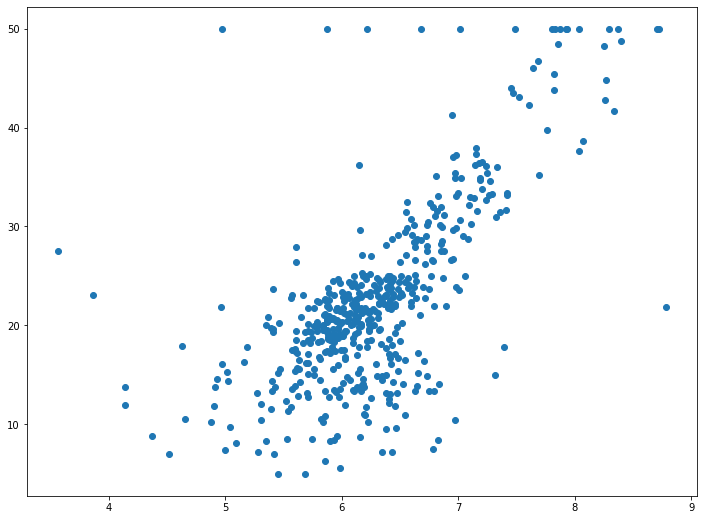

In [3]:
points = boston[['RM', 'PRICE']]
X = points.iloc[:, 0]
Y = points.iloc[:, 1]
plt.scatter(X, Y)
plt.show()

Definimos las funciones, una para el gradiente y otra para calcular el error. Recordemos que las fórmulas para calcular los gradientes son:

$$D_m = \frac{-2}{n} \sum_{i=0}^{n}x_i(y_i-\bar{y_i})$$
$$D_c = \frac{-2}{n} \sum_{i=0}^{n}(y_i-\bar{y_i})$$

In [4]:
def step_gradient(c_current, m_current, points, learningRate):
    c_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        point_x = points[i, 0]
        point_y = points[i, 1]
        
        pred_Y = (m_current * point_x) + c_current
        
        m_gradient += -(2/N) * point_x * (point_y - pred_Y)
        c_gradient += -(2/N) * (point_y - pred_Y)

        #m_gradient =  (-2/N) * (sum(X * (point_y - pred_Y)))
        #c_gradient =  (-2/N) * (sum(Y - pred_Y))
   
    new_c = c_current - (learningRate * c_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_c, new_m]

def compute_error_for_line_given_points(c, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + c)) ** 2
    return totalError / float(len(points))


Inicializamos los parámetros.

In [5]:
learning_rate = 0.02
initial_c = 0 # initial y-intercept guess
initial_m = 0 # initial slope guess
num_iterations = 7000

c = initial_c
m = initial_m

print('Error: ', compute_error_for_line_given_points(c, m, np.asarray(points)))
for i in range(num_iterations):
    c, m = step_gradient(c, m, np.array(points), learning_rate)
print('Error posterior: ', compute_error_for_line_given_points(c, m, np.asarray(points)))
print('m = ', m)
print('c = ', c)


Error:  592.1469169960473
Error posterior:  43.618731120278305
m =  8.911151358400605
c =  -33.455916803088954


Graficamos la predicción junto con los valores

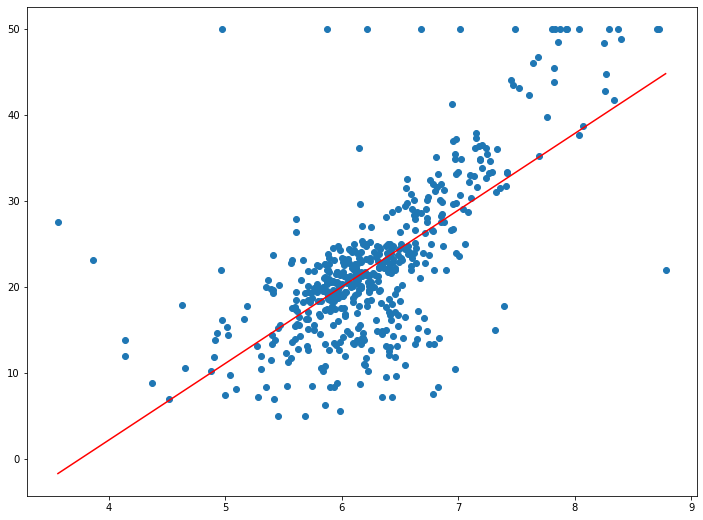

In [6]:
# Making predictions
Y_pred = m*X + c

plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.show()

<hr>

## Descomposición en valores singulares

Obtenemos el dataframe para analizar

In [7]:

B_svd = boston['PRICE']
A_svd = boston.drop(['PRICE'], axis = 1)
A_svd = boston[['RM']]

points_svd = np.column_stack([np.ones(A_svd.shape[0]), A_svd])
points_svd

array([[1.   , 6.575],
       [1.   , 6.421],
       [1.   , 7.185],
       ...,
       [1.   , 6.976],
       [1.   , 6.794],
       [1.   , 6.03 ]])

Separaremos la información en dos dataset del mismo tamaño, uno para entrenar y el otro para probar y hacer predicciones

In [8]:
X_train, X_test, y_train, y_test = train_test_split(A_svd, B_svd, test_size=0.50, random_state=42)

Obtenemos la descomposicion en valores singulares

In [9]:
u, s, v = np.linalg.svd(X_train, full_matrices=False)

In [10]:
print('Matriz unitaria ortogonal (U): ', u)
print('Vectores singulares (Σ): ', s)
print('Matriz unitaria ortogonal (VT): ', v)

Matriz unitaria ortogonal (U):  [[0.06088712]
 [0.06957257]
 [0.06471109]
 [0.07187486]
 [0.06713195]
 [0.05561063]
 [0.06328822]
 [0.04867412]
 [0.06119343]
 [0.06486919]
 [0.05786351]
 [0.05032426]
 [0.060897  ]
 [0.05402966]
 [0.06527431]
 [0.06772481]
 [0.07973031]
 [0.0664798 ]
 [0.05890102]
 [0.06484942]
 [0.0751949 ]
 [0.06035354]
 [0.05801173]
 [0.06511621]
 [0.05595647]
 [0.05688529]
 [0.05782399]
 [0.06155903]
 [0.05914805]
 [0.06537312]
 [0.06539288]
 [0.05580825]
 [0.06297202]
 [0.05569956]
 [0.05498812]
 [0.07062985]
 [0.05638135]
 [0.06885125]
 [0.0616776 ]
 [0.06054128]
 [0.05721136]
 [0.05937531]
 [0.06932555]
 [0.05864412]
 [0.05842673]
 [0.06896983]
 [0.04913853]
 [0.06462216]
 [0.0624088 ]
 [0.05834768]
 [0.058654  ]
 [0.08148914]
 [0.06488895]
 [0.05784375]
 [0.05871328]
 [0.07022472]
 [0.07245784]
 [0.08237843]
 [0.05857495]
 [0.05800185]
 [0.05814018]
 [0.08167688]
 [0.04088784]
 [0.05897019]
 [0.0562529 ]
 [0.06376251]
 [0.06357477]
 [0.06054128]
 [0.04088784]
 [

Aplicamos la descomposición a la matriz a los resultados de la matriz de entrenamiento

In [11]:
x_hat = np.dot(np.dot(np.dot(v.T, np.linalg.inv(np.diag(s))), u.T), y_train)
x_hat

array([3.6705989])

Aplicamos la matriz resultante al conjunto de entrenamiento y al conjunto de prueba para verificar el error.

In [12]:
train_predictions = X_train @ x_hat
test_predictions = X_test @ x_hat

In [13]:
train_mse = np.mean((train_predictions - y_train)**2)
test_mse = np.mean((test_predictions - y_test)**2)

In [14]:
print("Train Mean Squared Error:", train_mse)
print("Test Mean Squared Error:", test_mse)

Train Mean Squared Error: 59.676602133795846
Test Mean Squared Error: 57.1684632467957


Graficamos las predicciones y el target real

In [21]:
dt_test = test_predictions.to_frame(name='PREDICTED')
dt_target = B_svd.to_frame()
dt_test = dt_test.join(dt_target)
dt_test = dt_test.reset_index(drop=True)
dt_test



,PREDICTED,PRICE
0,23.550563,23.6
1,24.805907,32.4
2,21.961193,13.6
3,22.262182,22.8
4,23.113761,16.1
...,...,...
248,22.526465,19.3
249,24.295694,23.9
250,21.898793,24.7
251,21.223403,19.8


/Users/julioibarra/opt/anaconda3/envs/ingenieria-carac/lib/python3.8/site-packages/pandas/core/indexes/range.py:716: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return super().__getitem__(key)
/Users/julioibarra/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/julioibarra/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


<Figure size 288x72 with 0 Axes>

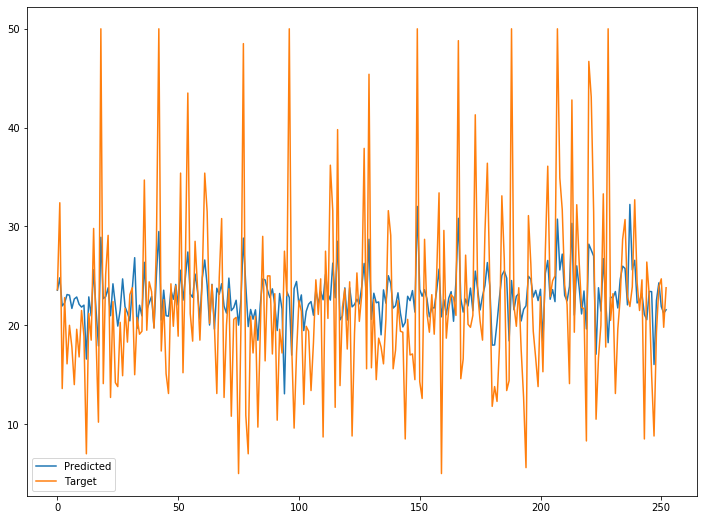

In [23]:
dt_test = test_predictions.to_frame(name='PREDICTED')
dt_target = B_svd.to_frame()
dt_test = dt_test.join(dt_target)
dt_test = dt_test.reset_index(drop=True)
dt_test = dt_test.rename(columns = {'PRICE': 'TARGET'})

plt.figure(figsize=(4,1))
fig, ax = plt.subplots(1)
ax.plot(dt_test.index, dt_test.iloc[:,0], label="Predicted")
ax.plot(dt_test.index, dt_test.iloc[:,1], label="Target")
#plt.figure(figsize=(12,5))
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#plt.legend()
plt.legend()
plt.show()





Graficamos lo entrenado con lo target real

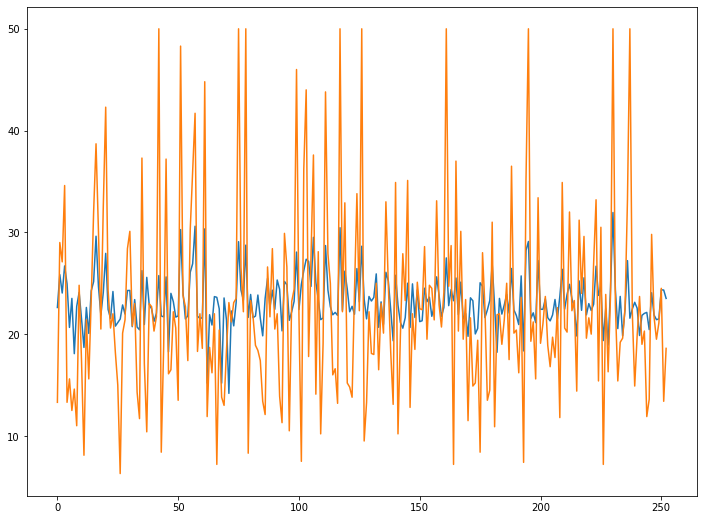

In [17]:
#plt.rcParams['figure.figsize'] = (12, 5)
dt_train = train_predictions.to_frame(name='TRAINED')
dt_target = B_svd.to_frame()
dt_train = dt_train.join(dt_target)
dt_train = dt_train.reset_index(drop=True)

dt_train = dt_train.rename(columns = {'PRICE': 'TARGET'})
fig, ax = plt.subplots(1)
l1 = plt.plot(dt_train.index, dt_train.iloc[:,0], label="Train")
l2 = plt.plot(dt_train.index, dt_train.iloc[:,1], label="Target")
#plt.figure(figsize=(10,5))

#plt.legend(handles=[line_up, line_down])
plt.show()

Graficamos la correlacion entre lo predecido y el target

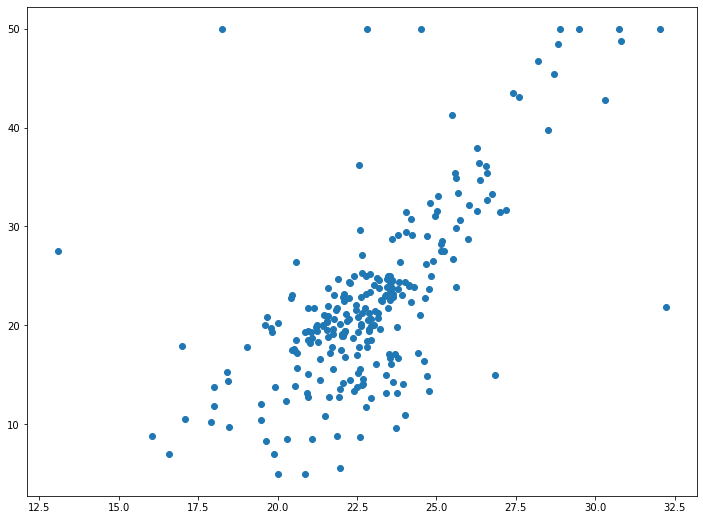

In [18]:
dt_test = test_predictions.to_frame(name='PREDICTION')
dt_target = B_svd.to_frame()
dt_test = dt_test.join(dt_target)
dt_test = dt_test.reset_index(drop=True)

#plt.plot(B_svd, X, color='red') # predicted
plt.scatter(dt_test.iloc[:,0], dt_test.iloc[:,1])
plt.show()